<a href="https://colab.research.google.com/github/dblack954/problem-statistics/blob/main/Final_Project_Dylan_Black.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Notebook - Spring 2024

In [ ]:
import matplotlib.pyplot as plt   # Importing the matplotlib library
import imageio    # Importing Imageio
import torch    # Importing torch
import torchvision    # Importing torchvision
from torchvision import models, transforms    # Importing the models and transforms
# from the torchvision library
import numpy as np    # Importing numpy
from torchvision.models import *    # Importing all the submodels form the
# torchvision models library
from PIL import Image   # Importing the image module from the Python Imaging Library (PIL)
import requests   # Importing requests module
from torchvision import models    # Importing the models submodule from torchvision
# library
from torchsummary import summary    # Importing the summary function from the torchsummary
# library

In [ ]:
def plot(x):    # Defining plot function
    fig, ax = plt.subplots()      # Creating a new figure and subplot
    im = ax.imshow(x,cmap='gray')  # Using the imshow function to display image
    # with a grayscale colormap
    ax.axis('off')    # Axis is set off
    fig.set_size_inches(20, 20)   # Figure size is set is to 20 x 20
    plt.show()    # Showing plot

In [ ]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')
# Loading image from url link with the imread function

<ipython-input-3-644995d8a64b>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')


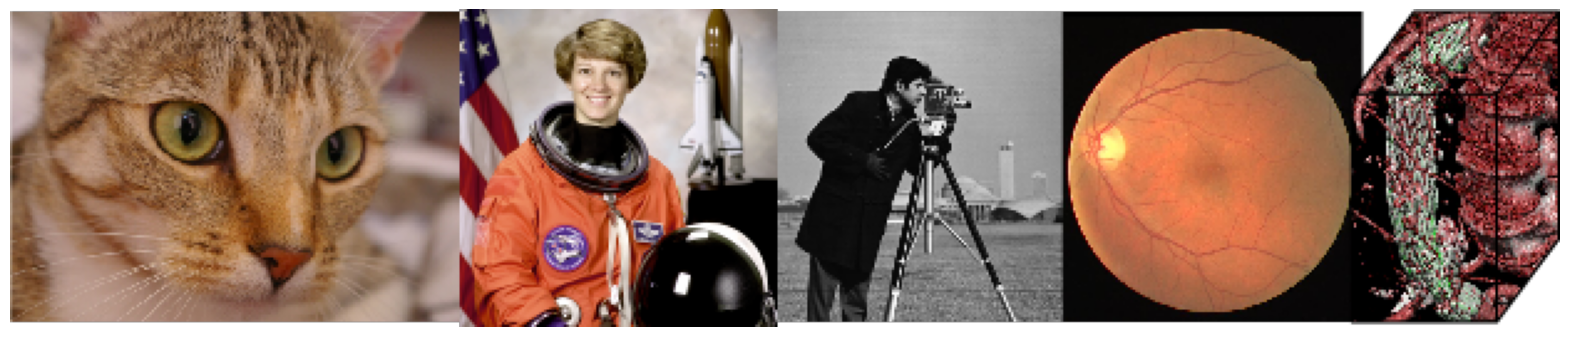

In [ ]:
plot(im)    # Showing Plot

In [ ]:
net = alexnet(pretrained=True).cuda(0)  # Loading Alexnet from the torchvision module

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 54.5MB/s]


In [ ]:
normalize = transforms.Normalize(   # Using normalization transform function
   mean=[0.485, 0.456, 0.406],    # The set of means
   std=[0.229, 0.224, 0.225]      # The set of standard deviations
)
preprocess = transforms.Compose([       # Using a compose function for the
                                 # preprocessing pipeline creation
   transforms.Resize(256),      # Resizing the the imagae size to 256 x 256
   transforms.CenterCrop(224),    # Center crop the image to 224 x 224
   transforms.ToTensor(),       # Converting the PIL image to a Pytorch tensor
   normalize
])

In [ ]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')
# Loading image with the url link with the imread function


<ipython-input-7-3ddc871f54a0>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')


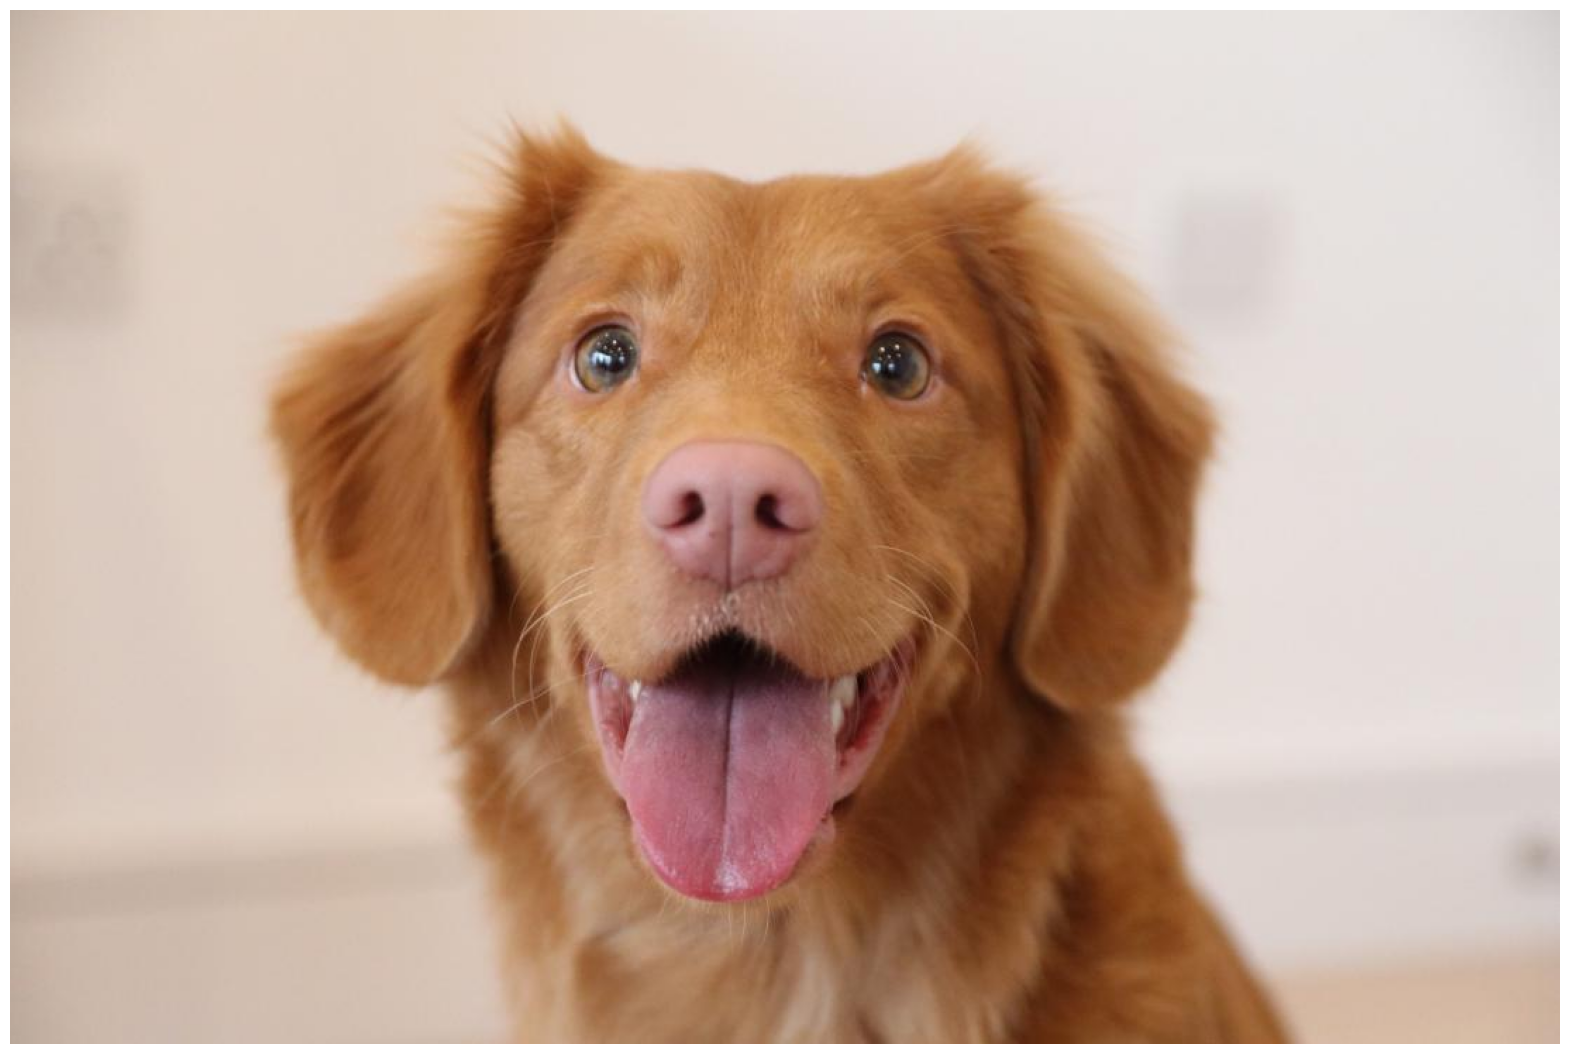

In [ ]:
plot(im)    # Showing plot

In [ ]:
image = Image.fromarray(im) #convert to pil

In [ ]:
img_tensor = preprocess(image)     # Inputing the preproccessing image to the
# image tensor

In [ ]:
img_tensor = img_tensor.unsqueeze_(0)   # Adding a batch dimension to the tensor

In [ ]:
img_tensor.shape    # The shape of the image tensor

torch.Size([1, 3, 224, 224])

In [ ]:
img_variable = torch.tensor(img_tensor).cuda(0)     # Converting the image tensor
# to a Pytorch and moving the tensor to the GPU

<ipython-input-13-9ebb08ca55f7>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)     # Converting the image tensor


In [ ]:
out = net(img_variable)

In [ ]:
label_index = out.cpu().data.numpy().argmax()   # Finding the index of the maximum
# value in the list with the use of the argmax method

In [ ]:
label_index   # The value of the label index

215

In [ ]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])   # Reversing the
# order of the last 10 elements of the numpy array, and then covnverted to the CPU

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'
# A url link the has a list of words for Alexnet to guess

In [ ]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}
# The url link is being installed for Alexnet to comprehend the words
# (Creating a dictionary for Alexnet)

In [ ]:
print(labels[label_index])    # printing the dictionary out along with a index of
# the label

Brittany spaniel


In [ ]:
for i in range(10):
    print(labels[top_list[i]])    # The top ten guesses that correspond to the
    # picture

Brittany spaniel
golden retriever
Sussex spaniel
vizsla, Hungarian pointer
tennis ball
Irish setter, red setter
clumber, clumber spaniel
cocker spaniel, English cocker spaniel, cocker
chow, chow chow
Tibetan mastiff


In [ ]:
net   # Displaying the variable for net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
summary(net, (3, 224, 224))       # The summary page of the picture

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy()   # selecting the first
# layer of the model, detaching it from the CPU, and converting it to the numpy array

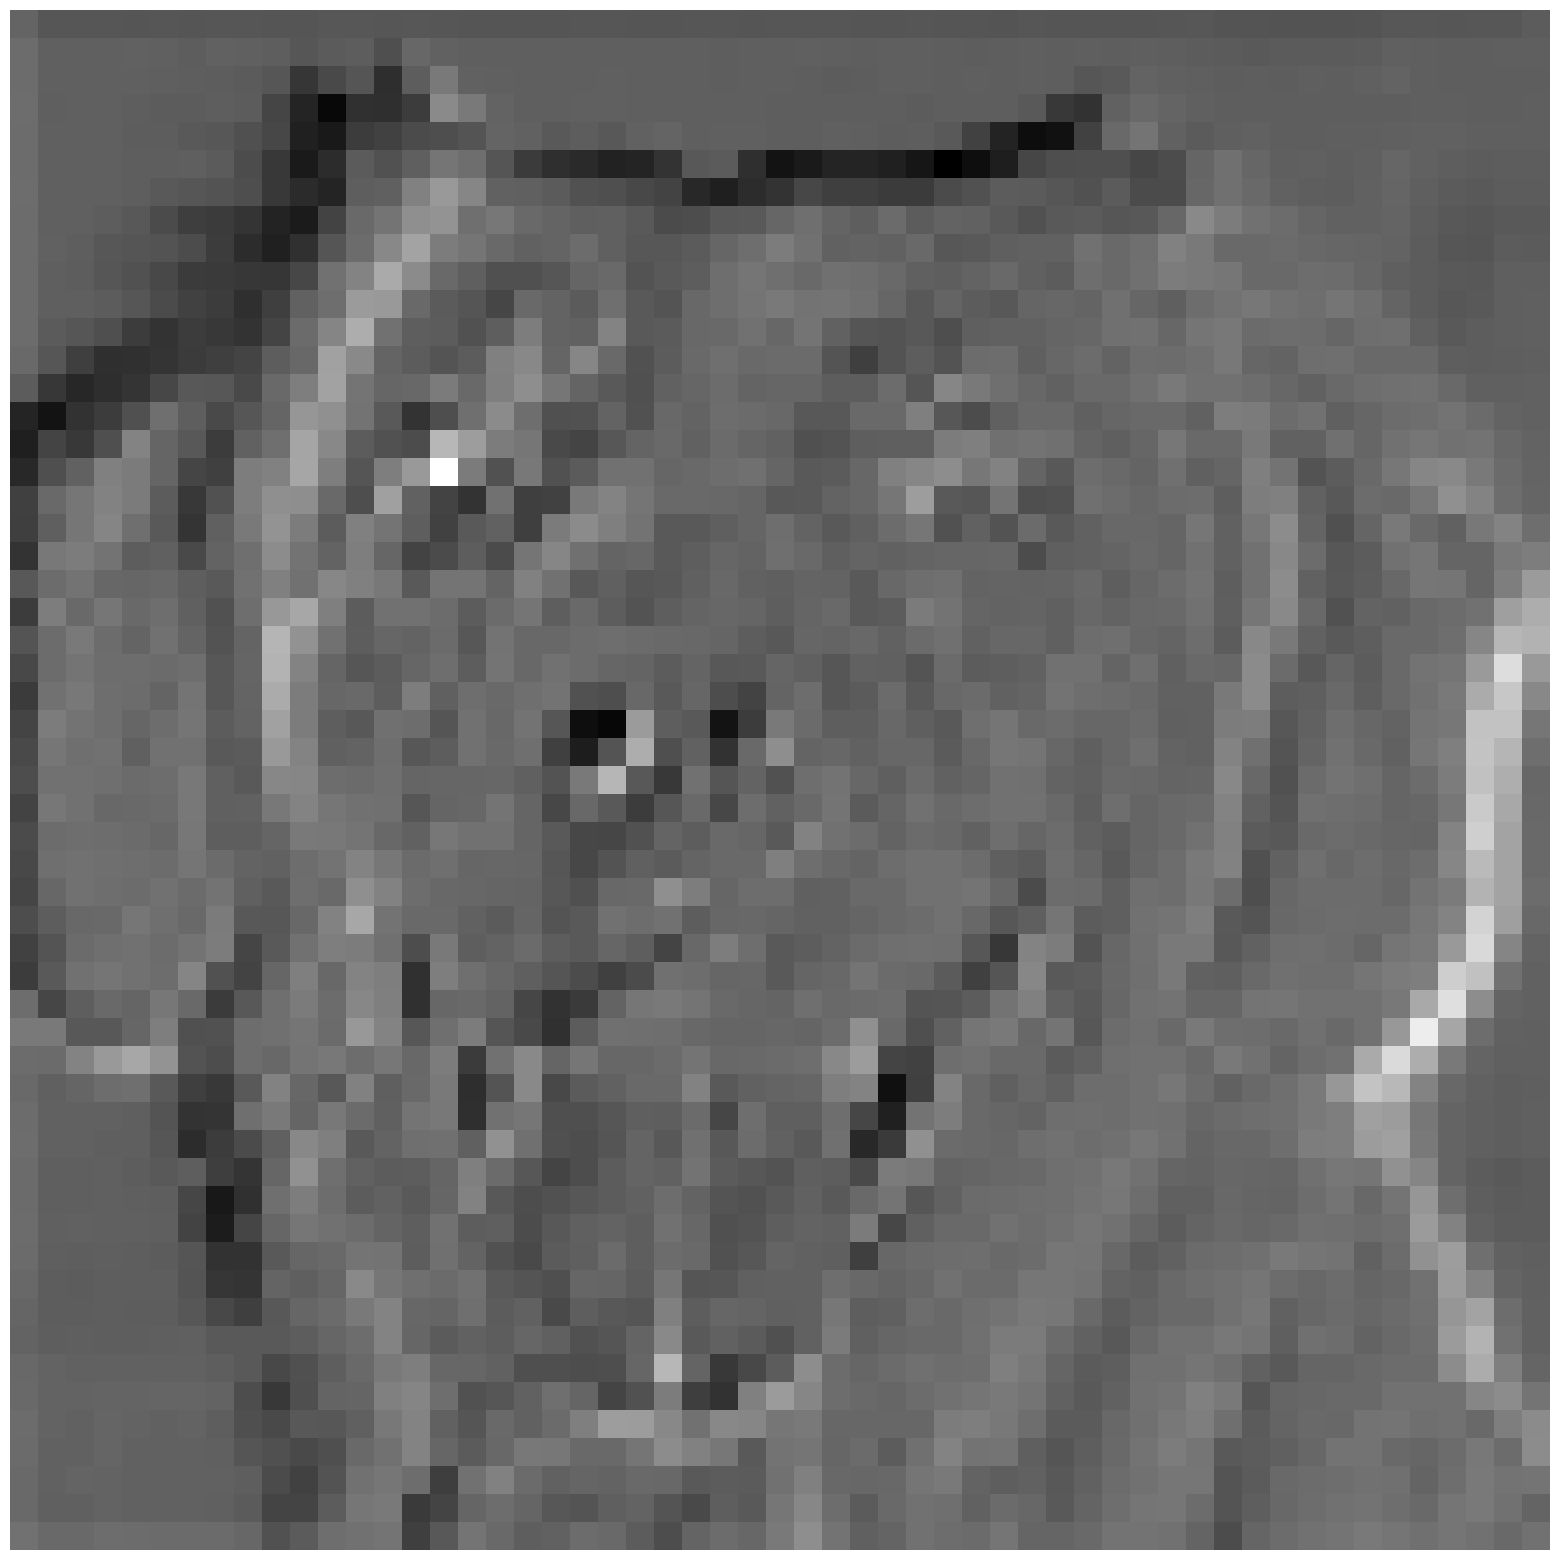

In [ ]:
plot(out[0,0,:,:])    # Displaying the first layer of the picture

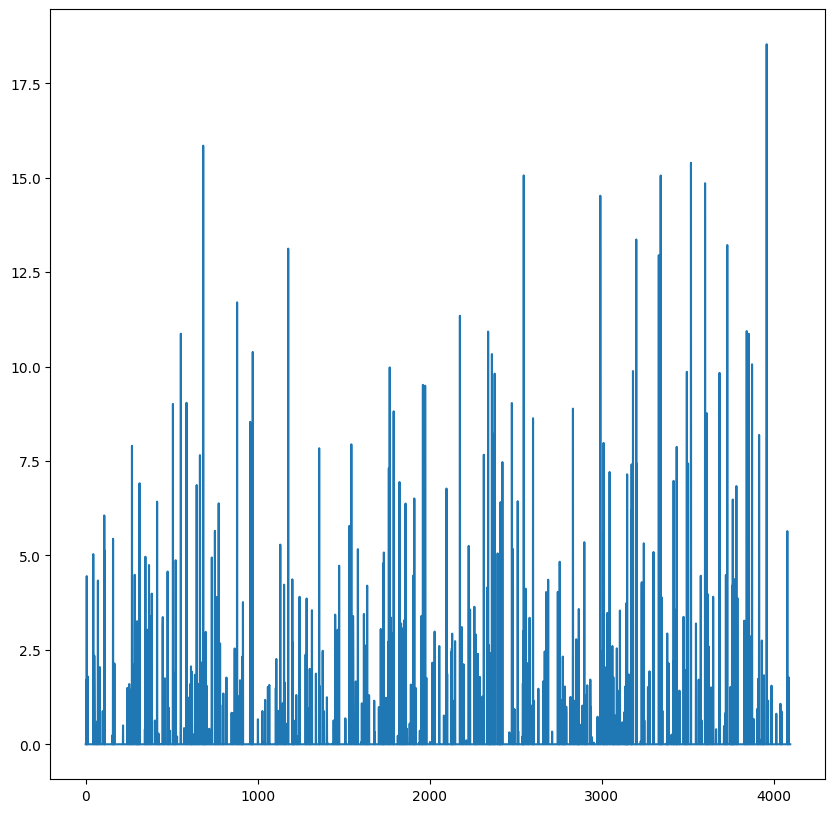

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
# Plotting the first six neurons in the classifier module of the net model for the
# previous image, then plotting the numpy array against the indices of the neurons
fig = plt.gcf()       # Setting the figure to its most previous figure
fig.set_size_inches(10, 10)     # Size of the graph is set by 10 x 10

In [ ]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')   # Displaying the
# most recent photo of Boca's beach

<ipython-input-27-97fe848f9728>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')   # Displaying the


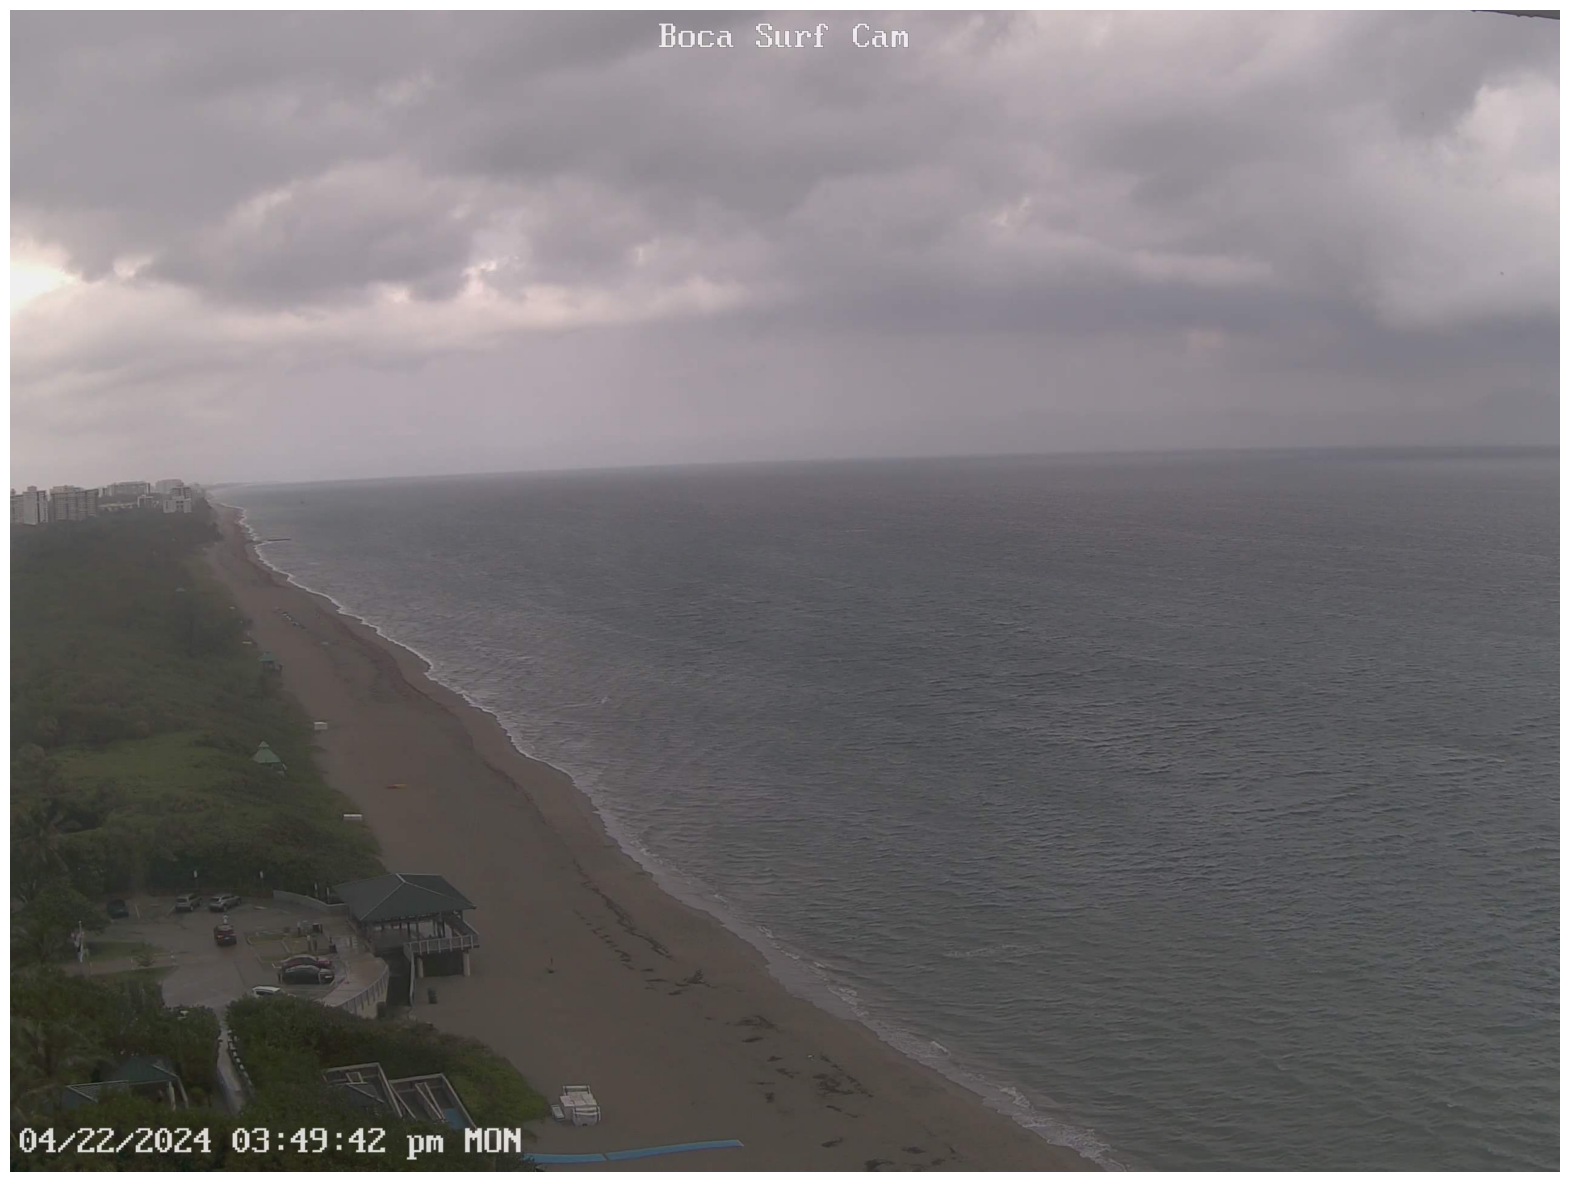

In [ ]:
plot(im)    # Displaying the image

In [ ]:
def load_im(im):    # Defining the image
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image)    # preprocessing the image
    img_tensor = img_tensor.unsqueeze_(0)   # Adding a new dimension to the image
    # tensor
    img_variable = torch.tensor(img_tensor).cuda(0)   # Converting the image tensor
    # to a pytorch tensor and then moved to the GPU with index 0
    return img_variable   # Return code for the image variable

In [ ]:
out = net(load_im(im))    # The output of the load_im(im) function

<ipython-input-29-7d7e69b999ea>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)   # Converting the image tensor


In [ ]:
def inference(im):    # Defining the inference function for the image model
    out = net(load_im(im))    # The function from last code
    label_index = out.cpu().data.numpy().argmax()   # Calcularting the index of
    # the maximum value in the "out" tensor and stroing it in the "label_index"
    # variable
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])   # reversing
    # the order of the elements in the idices, and then selecting the last ten
    # elements from the sorted indices
    print(labels[label_index])      # Printing out the labels for the label index
    print('____')           # Priniting out a string of underscores
    for i in range(10):       # Creating a loop that iterates the first ten elements
        print(labels[top_list[i]])    # that are within the "Top list", and prints
        # the corresponding labels

In [ ]:
inference(im)   # The output of the inference function of the image

wing
____
wing
volcano
sandbar, sand bar
breakwater, groin, groyne, mole, bulwark, seawall, jetty
seashore, coast, seacoast, sea-coast
promontory, headland, head, foreland
valley, vale
lakeside, lakeshore
drilling platform, offshore rig
cliff, drop, drop-off


<ipython-input-29-7d7e69b999ea>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)   # Converting the image tensor


# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

In [ ]:
%%capture
# This is used to suppress the output of the following commands
!pip install wandb      # Downloading and installing the weights and biases library
!apt-get install poppler-utils    # Downloading and installing the "popper-utils"
# package
!pip install pdf2image      # Downloading and installing the "pdf2image" library
!pip install flashtorch   # Downloading and installing the "flashtorch" library
import requests         # Importing the requests library
from pdf2image import convert_from_path   # From the "pdf2iage" library, importing
# the "convert_from_path" function
import matplotlib.pyplot as plt     # Importing the "matplotlib" library
import numpy as np    # Importing "numpy" library
import torch    # Importing "Torch" library
import requests   # Importing "requests" library
from torchvision import *     # From torchvision library, importing all tools and
# functions
from torchvision.models import *    # Importing all submodels from the torchvision.models
# library
from flashtorch.utils import apply_transforms   # Importing the "apply_transforms" function
# from the "flashtorch.utils" package
import wandb as wb    # Iporting the weights and biases library

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
    # A GPU function that has its argument set to where the gradients of the tensor
    # should be calculated

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))
    # Same code as previous line but the gradients of the tensor are set to be not
    # calculated

In [ ]:
def plot(x):    # Defining the plot function
    fig, ax = plt.subplots()      # Creating a new figure and single subplot
    im = ax.imshow(x, cmap = 'gray')      # Displaying the image with a gray colormap
    ax.axis('off')      # Axis setting is "off"
    fig.set_size_inches(5, 5)   # Figure size is set to 5 x 5
    plt.show()    # Showing the plot

In [ ]:
def get_google_slide(url):      # Defining the "get_google_slide" url function
    url_head = "https://docs.google.com/presentation/d/"    # The url head of the
    # url link
    url_body = url.split('/')[5]        # Splitting the sixth element of the url link
    page_id = url.split('.')[-1]      # Splitting the last element of the url link
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id
    # Return code for the url link function that will combine all of the components
    # together

def get_slides(url):    # Defining the "get_slides" url function
    url = get_google_slide(url)     # url is displayed as the "get_google_slide" url
    # function from previous line
    r = requests.get(url, allow_redirects=True)     # Using the requests library
    # to send a GET request to the specified URL
    open('file.pdf', 'wb').write(r.content)     # Opens a new file in binary write mode
    # and writing the contents of the "r.content" variable to the file
    images = convert_from_path('file.pdf', 500)   # Using the "convert_from_path"
    # function to convert the PDF file in to a list of images
    return images   # return function of the images

def load(image):    # Defining the "load(image)" function

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)
    # Return function of which it has been transformed to the input image, created a copy
    # of the image, detached from the computational graph, and moved the image to the device

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")   # Checking if the
# CUDA-enabled GPU is available, if yes, it will be set to the GPU. If no, the device is set
# to the CPU

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
# Using the dictionary comprehension to create a dictionary that maps integer keys
# to string values

In [ ]:
model = alexnet(weights='DEFAULT').to(device)   # Creating an instance of the Alexnet
# model, and moved to the GPU
model.eval();   # Sets the model to evaluation mode

In [ ]:
url = "https://docs.google.com/presentation/d/1IAoV3NDbhKtNjs21zgxFvxN8uz-ZWK4fVy6hhn8Y7xo/edit#slide=id.g2b78f466226_0_0"
# Url link

In [ ]:
images = []     # Empty list called "images"

for image in get_slides(url):       # Iterating the image in the list of the "get_slides"
# function

    plot(image)   # Plotting the images

    images.append(load(image))        # Appends the image loaded by the "load()" function
    # to the "image" list

images = torch.vstack(images)     # Vertically stacking the "image" list into a single tensor

In [ ]:
images.shape    # The shape of the images

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)     # applying the models to the "images" tensor

tensor([[-4.4859, -1.9622, -0.4950,  ..., -4.5325,  2.3382,  0.2733],
        [-2.6921, -3.6249,  1.8689,  ..., -4.6524, -1.6406, -0.0740],
        [-2.5635, -0.6893,  0.5704,  ..., -4.9149, -0.7559,  0.3770],
        ...,
        [-1.0446,  0.9287,  2.9946,  ..., -4.9203,  0.6787,  0.0492],
        [-2.4219, -4.0691,  4.0751,  ..., -6.9345, -1.4852,  1.6493],
        [-5.4022, -4.5221, -2.0315,  ..., -5.5951, -0.9986,  3.3488]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)   # "y" is being used to display the "model(images)" function

In [ ]:
y.shape   # The shape of "y"

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()      # Finding the index of the max value
# in each row of the "y" tensor in the second dimension, moved to the CPU, and converted
# the tensor to a Numpy array

In [ ]:
for i in list(guesses):   # Iterating the list of guesses and pritned the corresponding
    print(labels[i])    # class name from the "labels" dictionary

space shuttle
missile
table lamp
projectile, missile
projectile, missile
space shuttle
wreck
rule, ruler
Weimaraner
carpenter's kit, tool kit
binder, ring-binder
espresso maker
projectile, missile
megalith, megalithic structure
cleaver, meat cleaver, chopper
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
airship, dirigible
drilling platform, offshore rig
screw
binder, ring-binder
projectile, missile
space shuttle
radio, wireless
studio couch, day bed
letter opener, paper knife, paperknife
drilling platform, offshore rig
screw
cassette
television, television system
can opener, tin opener
ski
web site, website, internet site, site
corkscrew, bottle screw
airship, dirigible
binder, ring-binder
Band Aid
web site, website, internet site, site
drilling platform, offshore rig
ballpoint, ballpoint pen, ballpen, Biro
screwdriver
web site, website, internet site, site
binder, ring-binder
binder, ring-binder
sandbar, sand bar
Windsor tie
puck, hockey puck
screw
pelican

In [ ]:
Y = np.zeros(50,)   # Creating a Numpy array of 50 zeros
Y[25:] = 1    # Setting the elements from index 25 to the end to 1

In [ ]:
Y     # The result of "Y"

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy()      # "y" is detach from the tensor, moved to the CPU,
# and then converted into a numpy array

In [ ]:
X.shape   # The shape of "X"

(50, 1000)

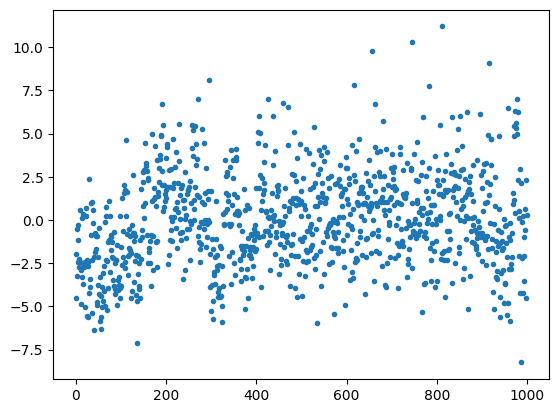

In [ ]:
plt.plot(X[0],'.')    # Plotting the first element of "X" using the data as points

In [ ]:
X[0]    # The first element of "X"

array([-4.4858627 , -1.9621556 , -0.49502653, -3.2205975 , -1.161249  ,
       -0.27586526, -2.4322054 , -2.6991525 , -2.2333045 ,  0.6074171 ,
       -2.4259653 , -4.888625  , -2.9044828 ,  0.13744566, -3.286198  ,
        0.34022364, -2.4757676 , -3.715782  , -2.7172112 , -2.569911  ,
       -5.006392  , -2.4052029 ,  0.72126174,  0.23428436, -2.323632  ,
       -5.5711527 , -2.4325042 , -2.6544957 , -5.6104116 ,  2.3792448 ,
       -4.252462  , -3.3971004 , -3.8665955 , -0.88013744,  0.98309124,
       -2.3094964 ,  1.0588601 , -5.374079  ,  0.5777233 , -0.1719892 ,
       -6.3421    , -2.1215906 , -1.8449461 , -0.7241239 , -1.6658418 ,
       -0.89710855, -4.9027767 , -0.9231035 , -4.760975  , -3.777956  ,
       -2.1528385 , -0.45502788, -4.284619  , -5.822161  , -3.285499  ,
       -5.621034  , -4.3907166 , -6.321781  , -5.0183396 , -3.8586173 ,
       -3.0481906 , -4.6583843 , -4.1186967 , -2.6327386 , -4.979142  ,
       -0.09393346,  0.73536307, -2.31747   ,  0.24990505, -2.36

In [ ]:
np.argmax(X[0])     # Finding the index in the first element of "X"

812

In [ ]:
labels[948]     # index 948 of the "labels"

'Granny Smith'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]      # Sorting the elements of the first element of "X"
# in descending order and select the first 10 indices

In [ ]:
for i in top_ten:     # Iterating the "top_ten" indices and printing out the labels
    print(labels[i])

space shuttle
projectile, missile
missile
web site, website, internet site, site
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus
knot
screen, CRT screen
white wolf, Arctic wolf, Canis lupus tundrarum
barn
seashore, coast, seacoast, sea-coast


In [ ]:
labels  # The result of the labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  4.,  46., 132., 275., 258., 183.,  70.,  25.,   4.,   3.]),
 array([-8.2457943 , -6.30075121, -4.35570812, -2.41066527, -0.46562234,
         1.47942066,  3.42446375,  5.36950684,  7.31454945,  9.25959301,
        11.20463562]),
 <BarContainer object of 10 artists>)

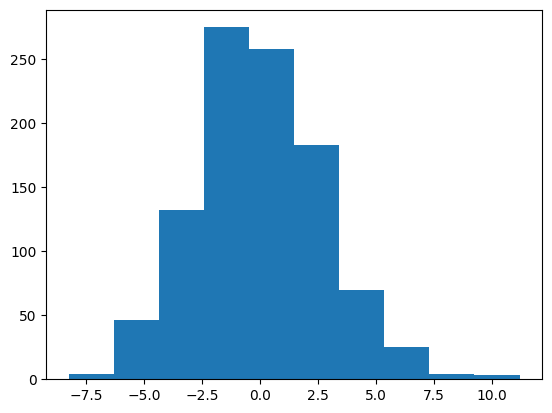

In [ ]:
plt.hist(X[0])    # Plotting a histogram of the first element of "X"

In [ ]:
X = GPU_data(X)   # Moving the x and y data to the GPU
Y = GPU_data(Y)

In [ ]:
def softmax(x):   # Defining the softmax function
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])   # Calculating the softmax of
    # the input tenosr "x"
    s = s1 / s1.sum(1)[:,None]      # Normalizing the softmax output
    return s      # Return function of "s"

In [ ]:
def cross_entropy(outputs, labels):     # Defining the cross entropy loss function
# between outputs and labels
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]
    # The return function calculates the softmax, log-softmax, log-probabilities, and the loss
    # of this function

In [ ]:
def Truncated_Normal(size):   # Defining the truncated_normal function

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)   # Generating random numbers
    u2 = torch.rand(size)   # for u1 and u2
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)   # Calculating the
    # truncated normal samples

    return z    # Return function of "z"

In [ ]:
def acc(out,y):   # Defining the accuracy function between output and "y"
    with torch.no_grad():     # Code that does not require gradients
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]
        # Return function of which it calculates the accuracy between the model output
        # and ground-truth labels

In [ ]:
X.shape     # The shape of "X"

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):    # Defining the "get_batch" function
    b = c.b
    if mode == "train":   # Training mode
        r = np.random.randint(X.shape[0]-b)   # Getting a random starting index
        # for the training data
        x = X[r:r+b,:]    # Extracting the the batch data and labels from the training
        # set
        y = Y[r:r+b]
    elif mode == "test":    # Testing mode
        r = np.random.randint(X_test.shape[0]-b)    # Getting a random starting index
        # for the test data
        x = X_test[r:r+b,:]     # Extracting the batch data and labels from the
        # test set
        y = Y_test[r:r+b]
    return x,y    # Return function of "x" and "y"

In [ ]:
def model(x,w):   # Defining the model function between the input data and the weights

    return x@w[0]   # Return function of the output

In [ ]:
def make_plots():     # Defining the "make_plots" function

    acc_train = acc(model(x,w),y)   # Calculating the training accuracy

    wb.log({"acc_train": acc_train})      # Logging the training accuracy to Weights
    # and Biases

In [ ]:
wb.init(project="Linear_Model_Photo_1");    # Initializing the Weights and Biases
# run with the Project Named " Linear_Model_Photo_1"
c = wb.config   # Retrieving the Weights and Biases configuration

c.h = 0.001   # Setting the value of the "h" parameter in the Weights and Biases
# configuration
c.b = 4   # Similar code to last line but for "b" parameter
c.epochs = 100000   # Similar code to last line but for the "epochs" parameter

w = [GPU(Truncated_Normal((1000,2)))]   # Creating a list containing a GPU tensor
# initialized using the "Truncated_Normal" function

optimizer = torch.optim.Adam(w, lr=c.h)     # Creating a new Adam optimizer to update
# the weights during the training process

for i in range(c.epochs):     # Iterating for "c.epoch" number of times

    x,y = get_batch('train')    # Using the "get_batch" function with the training batch

    loss = cross_entropy(softmax(model(x,w)),y)   # Calculating the cross-entropy
    # loss between the model output and the ground-truth labels

    optimizer.zero_grad()   # Resetting the gradients of all parameters in the optimizer
    # to zero
    loss.backward()   # Using the backward function which caluclates the gradients of
    # all parameters that are involved in the computation of the loss
    optimizer.step()    # performing an optimization step using the Adam optimizer

    wb.log({"loss": loss})    # Logging the current value of the loss to the Weights
    # and Biases library

    make_plots()    # Calculating or logging the training accuracy and losses
    # to Weights and Biases


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-34-d2f552a2c40b>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


In [ ]:
from google.colab import files      # Uploading the Loss graph to google colab
uploaded = files.upload()

Saving W&B Chart 4_24_2024, 4_54_52 PM.png to W&B Chart 4_24_2024, 4_54_52 PM.png


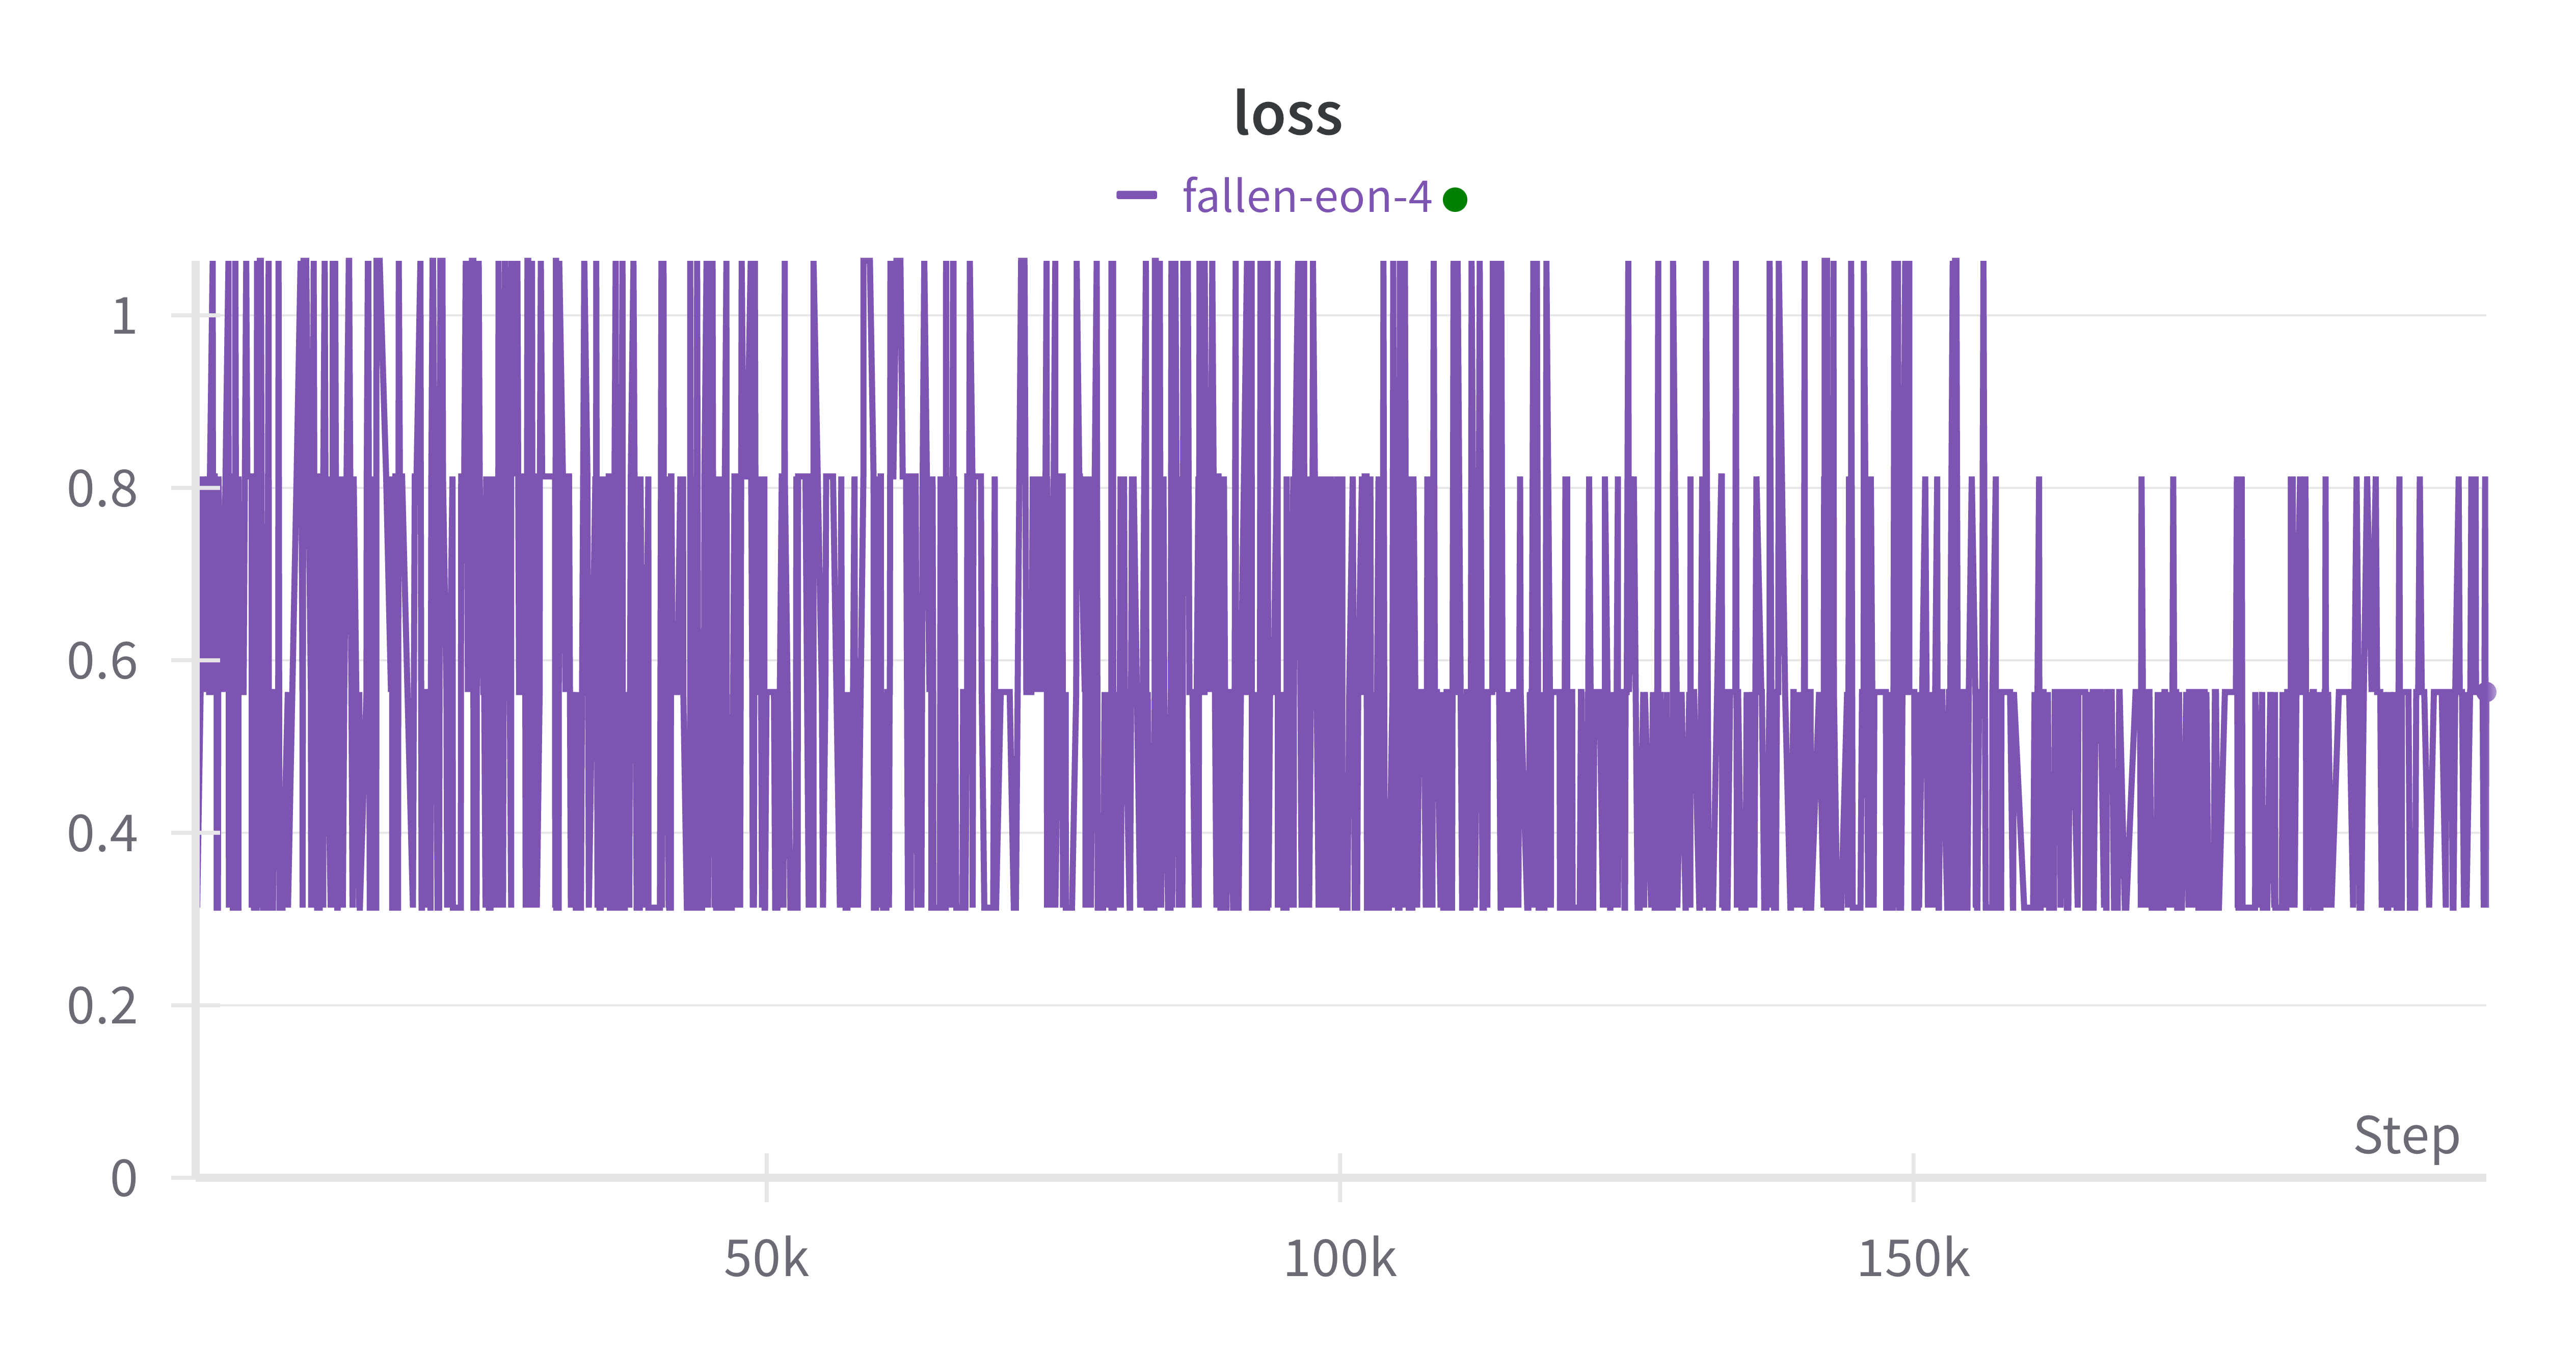

In [ ]:
from IPython.display import Image       # Displaying the Loss graph, which is the
# cross-entropy loss betweeen the model output and ground-truth labels
Image("W&B Chart 4_24_2024, 4_54_52 PM.png")


In [ ]:
from google.colab import files      # Uploading the Accuracy Training graph to
# the google colab notebook
uploaded = files.upload()

Saving W&B Chart 4_24_2024, 5_03_32 PM.png to W&B Chart 4_24_2024, 5_03_32 PM.png


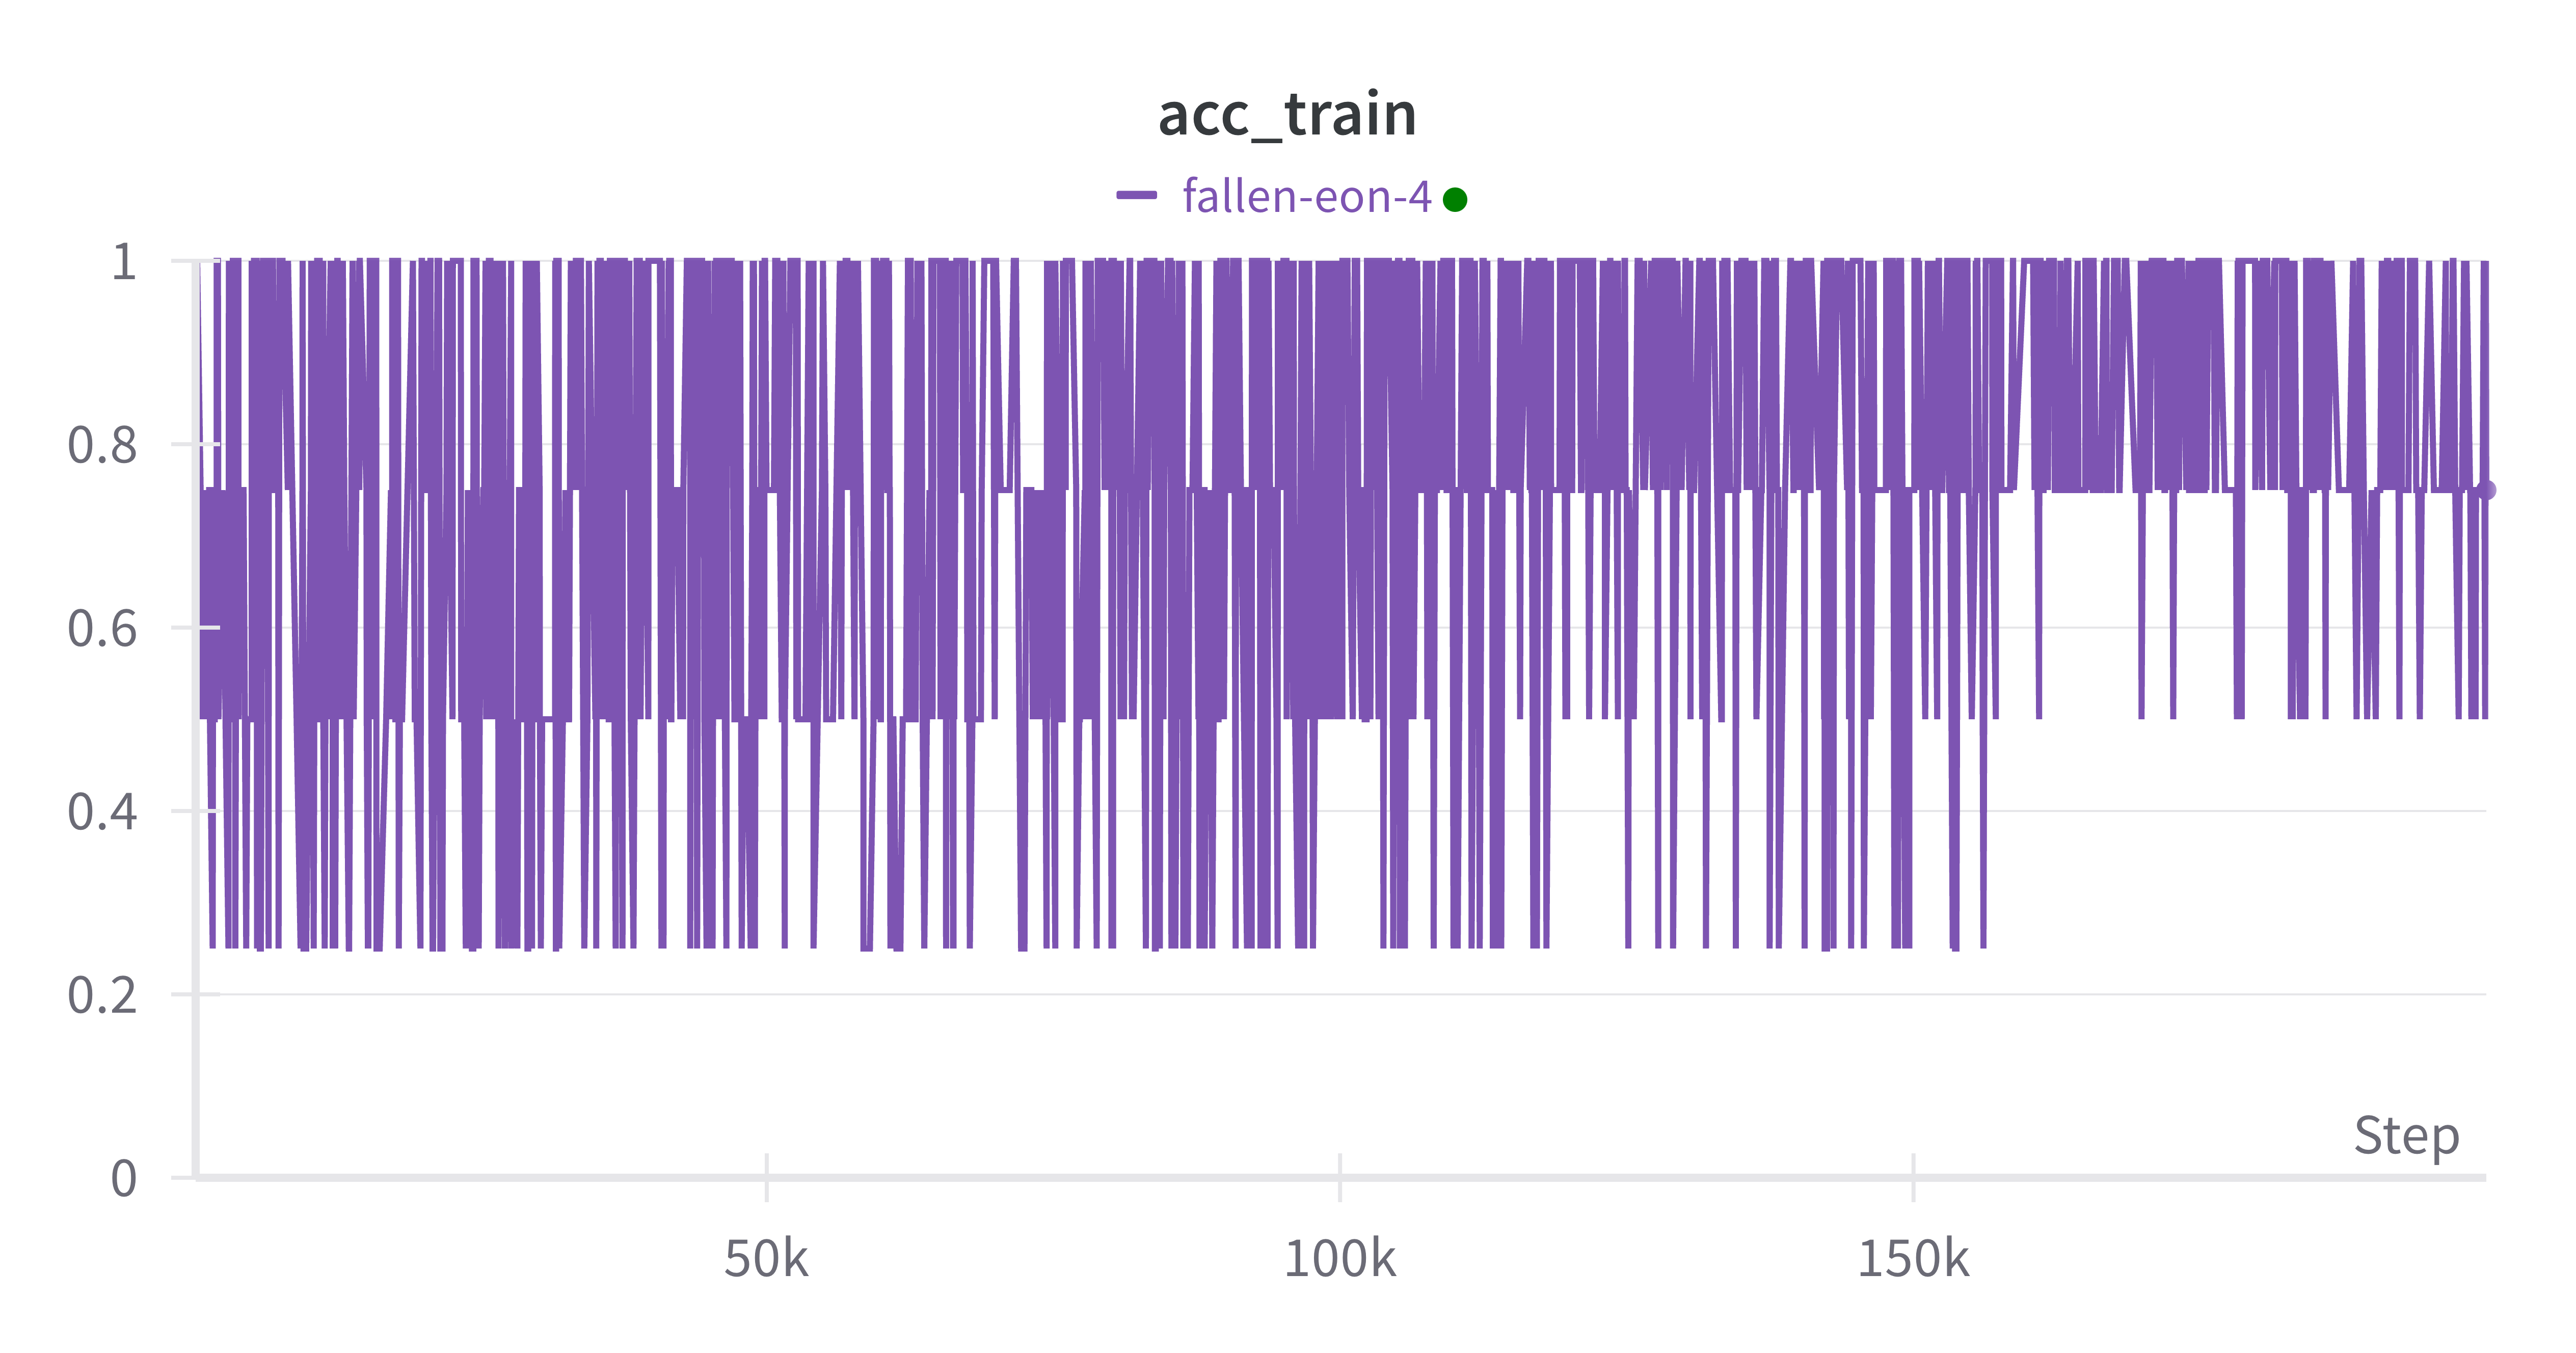

In [ ]:
from IPython.display import Image               # Displaying the Accuracy Training
# graph, which is the training results for  its accuracy
Image("W&B Chart 4_24_2024, 5_03_32 PM.png")
